# GitHub analysis client
This first version runs the analysis and takes for granted that pulsar already has the information it needs to do this.

In [1]:
import matplotlib.pyplot as plt
import time
import operator
import pulsar
import _pulsar

In [41]:
# Function to plot the results
def plot_dict(dictionary, title='', xlabel='', ylabel=''):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    ax.set_ylabel(ylabel)
    ax.set_title(title)

    top_languages = dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True))
    x_axis = list(top_languages.keys())
    y_axis = list(top_languages.values())
    plt.bar(range(len(top_languages)), y_axis, tick_label=x_axis)
    plt.show()
    
# Function to fetch the results from Pulsar based on a topic name and values to receive
# it assumes it will receive messages ordered and in tuple format
def get_top_values(topic, num_values):
    
    client = pulsar.Client('pulsar://localhost:6650')
    
    curr_time = str(int(time.time()))
    
    # Create a consumer on persistent topic, starting from the initial position
    # and with a unique subscription name, so to always get all info
    consumer = client.subscribe(
        topic='persistent://public/default/'+topic,
        subscription_name=topic+'_sub_'+curr_time,
        initial_position=_pulsar.InitialPosition.Earliest)
    
    result_dict = {}
    for i in range(num_values):
        msg = consumer.receive()
        try:
            # Save the string message (decode from byte value)
            message = str(msg.value().decode())
            # Acknowledge that the message was received
            
            consumer.acknowledge(msg)
            
            # Check for the 'EOS' (End of String) property we added to the last message
            # If we find it, exit the loop to stop receiving more messages
            msg_properties = msg.properties()
            if 'EOS' in msg_properties.keys():
                if(msg_properties['EOS']=='True'):
                    print("\n*** Reached end of values ***\n")
                    break
            
            # Evaluate the string (should have tuple format) and add to dict
            result_dict.update(dict([eval(message)]))            

        except:
            print("There has been an exception")
            consumer.negative_acknowledge(msg)
    
    client.close()
    
    return result_dict

# 1. Top programming languages based on the number of projects developed

2022-05-23 07:56:09.713 INFO  [140256519571264] Client:88 | Subscribing on Topic :persistent://public/default/top_languages
2022-05-23 07:56:09.715 INFO  [140256519571264] ClientConnection:189 | [<none> -> pulsar://localhost:6650] Create ClientConnection, timeout=10000
2022-05-23 07:56:09.715 INFO  [140256519571264] ConnectionPool:96 | Created connection for pulsar://localhost:6650
2022-05-23 07:56:09.719 INFO  [140255600891648] ClientConnection:375 | [127.0.0.1:46526 -> 127.0.0.1:6650] Connected to broker
2022-05-23 07:56:09.721 INFO  [140255600891648] HandlerBase:64 | [persistent://public/default/top_languages, top_languages_sub_1653292569, 0] Getting connection from pool
2022-05-23 07:56:09.920 INFO  [140255600891648] ConsumerImpl:224 | [persistent://public/default/top_languages, top_languages_sub_1653292569, 0] Created consumer on broker [127.0.0.1:46526 -> 127.0.0.1:6650] 
2022-05-23 07:56:09.940 INFO  [140256519571264] ClientImpl:496 | Closing Pulsar client with 0 producers and 1

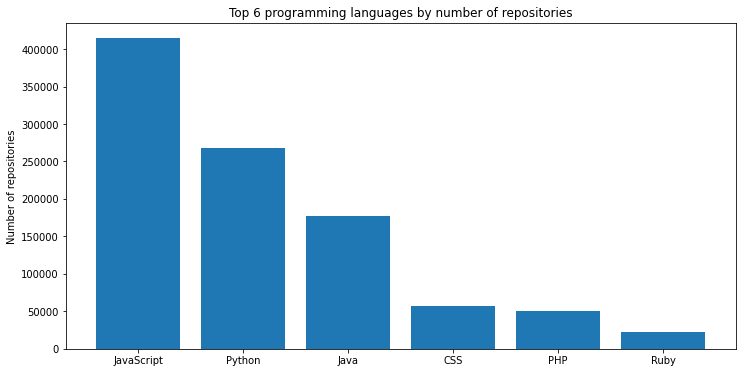

In [43]:
# Define the number of top languages to return, get the results, and plot them
num_results = 6
q1_dict = get_top_values('top_languages', num_results)
returned_results = len(q1_dict)
plot_dict(q1_dict, 
          title=f'Top {returned_results} programming languages by number of repositories', 
          xlabel='', ylabel='Number of repositories')

# 2. Repositories with most commits

# 3. Top languages with testdriven approach

# 4. Top languages with testdriven approach and continous integration